# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from scipy.stats import linregress

import config

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude --> do this for the second section of the HW
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
#URL
url = "http://api.openweathermap.org/data/2.5/weather?"

#units
units = "imperial"

#build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#lists to hold response info
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#log print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Start the counter 
counter = 1

#loop through the list of cities and perform a request for data on each
#Loop through the cities in the city list 
for city in cities: 
    try:
        response = requests.get(query_url + city).json()
        
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])        
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]  
        
        print(f"Processing Record {counter}| {city}")
        counter = counter +1

    except:
        print("City not found. Skipping...")
    continue
        




Beginning Data Retrieval
-------------------------------
Processing Record 1| moron
Processing Record 2| east london
Processing Record 3| puerto ayora
Processing Record 4| mataura
Processing Record 5| cape town
City not found. Skipping...
Processing Record 6| bubaque
Processing Record 7| kodiak
Processing Record 8| jamestown
Processing Record 9| arraial do cabo
Processing Record 10| castro
Processing Record 11| geraldton
Processing Record 12| ponta do sol
Processing Record 13| along
Processing Record 14| tuktoyaktuk
Processing Record 15| rikitea
Processing Record 16| te anau
Processing Record 17| new norfolk
City not found. Skipping...
Processing Record 18| lavrentiya
Processing Record 19| udayagiri
Processing Record 20| fort nelson
Processing Record 21| saskylakh
City not found. Skipping...
Processing Record 22| panaba
Processing Record 23| saint-joseph
Processing Record 24| punta arenas
Processing Record 25| ushuaia
City not found. Skipping...
Processing Record 26| mahebourg
Processi

Processing Record 233| maltahohe
Processing Record 234| campo de criptana
Processing Record 235| husavik
Processing Record 236| namibe
Processing Record 237| saint anthony
Processing Record 238| taltal
Processing Record 239| janoshaza
City not found. Skipping...
Processing Record 240| huaihua
Processing Record 241| oistins
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 242| gladstone
Processing Record 243| codrington
Processing Record 244| penzance
Processing Record 245| salym
Processing Record 246| bin qirdan
Processing Record 247| nizhnyaya poyma
Processing Record 248| nelson bay
Processing Record 249| yulara
Processing Record 250| bridgetown
Processing Record 251| praia da vitoria
Processing Record 252| panjab
Processing Record 253| ilo
Processing Record 254| mount pleasant
Processing Record 255| bam
Processing Record 256| ilulissat
Processing Record 257| bantry
Processing Record 258| yarada
Processing Record 259| chuy
Processin

Processing Record 467| poddorye
Processing Record 468| sur
Processing Record 469| mao
Processing Record 470| salinopolis
City not found. Skipping...
Processing Record 471| kewanee
City not found. Skipping...
Processing Record 472| evensk
Processing Record 473| lazurne
Processing Record 474| touros
Processing Record 475| rio claro
Processing Record 476| rio blanco
Processing Record 477| usinsk
City not found. Skipping...
Processing Record 478| kindu
Processing Record 479| quang ngai
Processing Record 480| koungheul
Processing Record 481| bambanglipuro
Processing Record 482| heyang
Processing Record 483| rio grande
City not found. Skipping...
Processing Record 484| margate
Processing Record 485| shingu
Processing Record 486| longonjo
Processing Record 487| mansehra
Processing Record 488| tupelo
Processing Record 489| grafton
Processing Record 490| potam
Processing Record 491| macapa
Processing Record 492| tutoia
Processing Record 493| saint-francois
Processing Record 494| bengkulu
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:


#display the lists into a dataframe
city_df = pd.DataFrame({"City": city_name ,"Lat": lat,"Lng":lng, 
"Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed, 
"Country": country, "Date": date})
city_df

#export city data into csv
city_df.to_csv('citydata.csv')


In [27]:
#get statistical information about the dataframe
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,5.310000e+02
mean,21.526644,18.887166,49.559322,70.403013,51.340866,8.534463,1.613226e+09
std,33.420218,90.757007,35.445546,21.230174,40.742943,6.823465,6.701284e+01
min,-54.800000,-179.166700,-41.800000,4.000000,0.000000,0.270000,1.613226e+09
25%,-5.053850,-63.990850,24.790000,59.500000,1.000000,3.440000,1.613226e+09
50%,26.101100,18.957000,61.000000,76.000000,62.000000,6.910000,1.613226e+09
75%,49.509750,101.085650,78.800000,86.000000,90.000000,11.095000,1.613226e+09
max,78.218600,179.316700,107.960000,100.000000,100.000000,47.180000,1.613226e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
#remove cites where humidity is > 100 --> create new df with cities less than 100
#based on the describe method results, the max is 100 so there isnt any city to be removed
filtered_city_df = city_df[city_df['Humidity'] < 100]
filtered_city_df
    

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Morón,-34.6534,-58.6198,82.00,65,88,1.99,AR,1613226152
1,East London,-33.0153,27.9116,82.40,69,0,6.91,ZA,1613226152
2,Puerto Ayora,-0.7393,-90.3518,80.60,78,20,6.91,EC,1613226152
3,Mataura,-46.1927,168.8643,57.00,74,100,1.99,NZ,1613226152
4,Cape Town,-33.9258,18.4232,78.80,57,0,18.41,ZA,1613225954
...,...,...,...,...,...,...,...,...,...
526,Nanchang,28.6833,115.8833,58.53,79,83,3.29,CN,1613226178
527,Fernandina Beach,30.6697,-81.4626,54.00,96,90,6.91,US,1613226178
528,Kysyl-Syr,63.8986,122.7617,-13.92,88,100,7.11,RU,1613226179
529,Znamenskoye,57.1281,73.8282,0.28,93,100,7.45,RU,1613226179


In [29]:
#Get the indices of cities that have humidity over 100%.
humidity_over_100_city_df = city_df[city_df['Humidity']>100].index.tolist()
print(humidity_over_100_city_df)

[]


In [30]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#filtered_city_df(inpalce=False)
clean_city_data = filtered_city_df
clean_city_data



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Morón,-34.6534,-58.6198,82.00,65,88,1.99,AR,1613226152
1,East London,-33.0153,27.9116,82.40,69,0,6.91,ZA,1613226152
2,Puerto Ayora,-0.7393,-90.3518,80.60,78,20,6.91,EC,1613226152
3,Mataura,-46.1927,168.8643,57.00,74,100,1.99,NZ,1613226152
4,Cape Town,-33.9258,18.4232,78.80,57,0,18.41,ZA,1613225954
...,...,...,...,...,...,...,...,...,...
526,Nanchang,28.6833,115.8833,58.53,79,83,3.29,CN,1613226178
527,Fernandina Beach,30.6697,-81.4626,54.00,96,90,6.91,US,1613226178
528,Kysyl-Syr,63.8986,122.7617,-13.92,88,100,7.11,RU,1613226179
529,Znamenskoye,57.1281,73.8282,0.28,93,100,7.45,RU,1613226179


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot



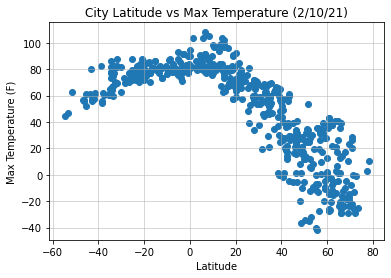

<Figure size 432x288 with 0 Axes>

In [31]:
#Latitude vs Temperature Scatter Plot - Matplotlib, 
#figure out how to put the date in the title

#plot style

#Scatter plot x labels, y labels, title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (2/10/21)")

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

lat_vs_temp_splot = plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'])
plt.show()

#save plot as png
plt.savefig("../Images/City Latitude vs Max Temperature.png")


## Latitude vs. Humidity Plot



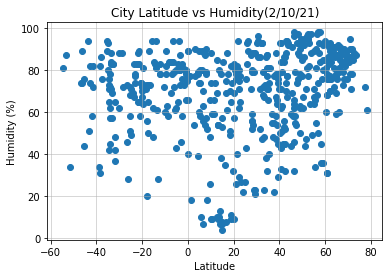

<Figure size 432x288 with 0 Axes>

In [32]:
#Scatter plot x labels, y labels, title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity(2/10/21)")

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


lat_vs_humidity_splot = plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'])
plt.show()

#save plot as png
plt.savefig("../Images/City Latitude vs Humidity.png")


## Latitude vs. Cloudiness Plot



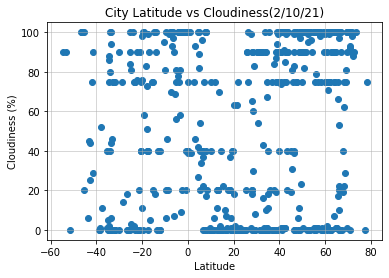

<Figure size 432x288 with 0 Axes>

In [33]:
#Scatter plot x labels, y labels, title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness(2/10/21)")

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


lat_vs_cloud_splot = plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'])
plt.show()

#save plot as png
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot



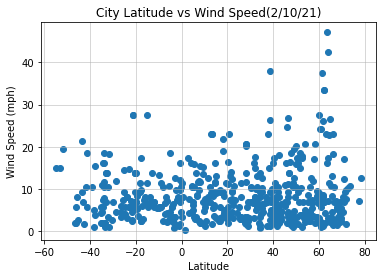

<Figure size 432x288 with 0 Axes>

In [34]:
#Scatter plot x labels, y labels, title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed(2/10/21)")

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#create scatter plot
lat_vs_wind_speed_splot = plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'])
plt.show()

#save plot as png
plt.savefig("../Images/City Latitude vs Wind Speed.png")

## Linear Regression

In [35]:
#linear regress

#northern Hemisphere - Max Temp vs Latitude Linear Regression
#1. create northern hemi DF
#Northern Hemisphere (greater than or equal to 0 degrees latitude)
#2. obtain slops and b (y-intercept)
#3. add linear regression line to scatterplot

#Northern Hemi DF
north_hemi_df = city_df[city_df['Lat']>=0]
north_hemi_df

#x and y values
x = np.array(north_hemi_df['Lat'])
y = np.array(north_hemi_df['Max Temp'])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression



R squared: 0.7422977912882794
y = -1.55x + 99.87


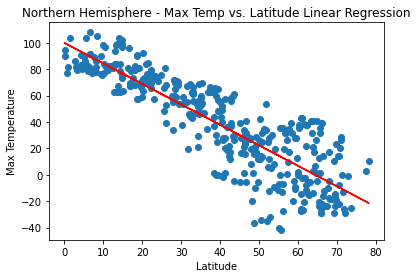

In [36]:
#northern Hemi Plot

#plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x,y)

# Plot regression line
plt.plot(x,regress_values,"r-")

# Print r square value
print(f"R squared: {rvalue**2}")

print(line_eq)

plt.show()
                           

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression



R squared: 0.7422977912882794
y = -1.55x + 99.87


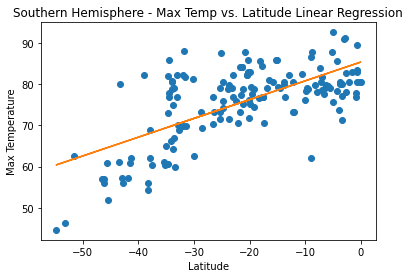

In [37]:
#linear regress

#southern Hemisphere - Max Temp vs Latitude Linear Regression
#1. create northern hemi DF
#southern Hemisphere (less than 0 degrees latitude)
#2. obtain slops and b (y-intercept)
#3. add linear regression line to scatterplot

#Northern Hemi DF
south_hemi_df = city_df[city_df['Lat']<0]
south_hemi_df

#plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#x and y values
x = np.array(south_hemi_df['Lat'])
y = np.array(south_hemi_df['Max Temp'])


#north_hemi_plot = plt.scatter(north_hemi_df['Lat'],north_hemi_df['Max Temp'])
plt.plot(x, y, "o")

#obtain m and b(intercept)
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatter plot
plt.plot(x, m*x+b)

#Print r square value
print(f"R squared: {rvalue**2}")

print(line_eq)

plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Observation: There is a weak relationship between humidity and latitude in the Northern hemisphere. The lowest humidity values are closer to 0* latitude as well. 

R squared: 0.14486894754232443
y = 0.43x + 52.59


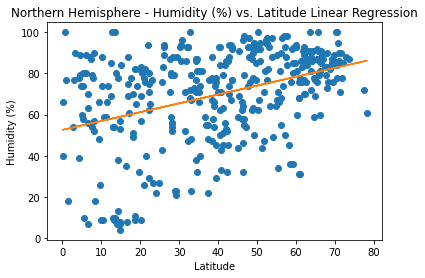

In [38]:
#linear regress

#northern Hemisphere - Humidity vs Latitude Linear Regression
#1. create northern hemi DF
#Northern Hemisphere (greater than or equal to 0 degrees latitude)
#2. obtain slops and b (y-intercept)
#3. add linear regression line to scatterplot

#x and y values
x = np.array(north_hemi_df['Lat'])
y = np.array(north_hemi_df['Humidity'])

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

plt.plot(x, y, "o")

#obtain m and b(intercept)
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatter plot
plt.plot(x, m*x+b)

#Print r square value
print(f"R squared: {rvalue**2}")

print(line_eq)

plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Observation: There is no significant correlation between humidity and latitude in the Southern Hemisphere. 

R squared: 0.14486894754232443
y = 0.43x + 52.59


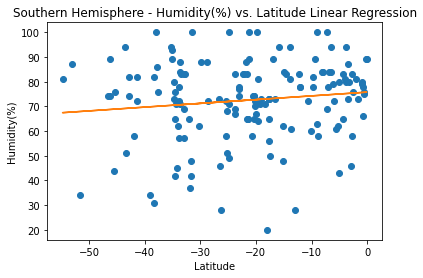

In [39]:
#linear regress

#southern Hemisphere - Humidity vs Latitude Linear Regression
#1. create northern hemi DF
#southern Hemisphere (less than 0 degrees latitude)
#2. obtain slops and b (y-intercept)
#3. add linear regression line to scatterplot

#Northern Hemi DF
south_hemi_df = city_df[city_df['Lat']<0]
south_hemi_df

#plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression")

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#x and y values
x = np.array(south_hemi_df['Lat'])
y = np.array(south_hemi_df['Humidity'])


plt.plot(x, y, "o")

#obtain m and b(intercept)
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatter plot
plt.plot(x, m*x+b)

#Print r square value
print(f"R squared: {rvalue**2}")

print(line_eq)

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Observation: There is a weak correlation between cloudiness and latitude in the Northern Hemisphere. Many outlier data points

R squared: 0.10296236816228044
y = 0.66x + 24.28


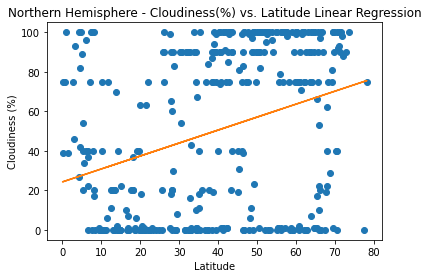

In [40]:
#linear regress

#northern Hemisphere - Cloudiness (%)  vs Latitude Linear Regression
#1. create northern hemi DF
#Northern Hemisphere (greater than or equal to 0 degrees latitude)
#2. obtain slops and b (y-intercept)
#3. add linear regression line to scatterplot

#x and y values
x = np.array(north_hemi_df['Lat'])
y = np.array(north_hemi_df['Cloudiness'])

#plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#north_hemi_plot = plt.scatter(north_hemi_df['Lat'],north_hemi_df['Max Temp'])
plt.plot(x, y, "o")

#obtain m and b(intercept)
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatter plot
plt.plot(x, m*x+b)

#Print r square value
print(f"R squared: {rvalue**2}")

print(line_eq)

plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Observation: The correlation between cloudiness and latitude in the Southern hemisphere is not significant. There are many outliers

R squared: 0.10296236816228044
y = 0.66x + 24.28


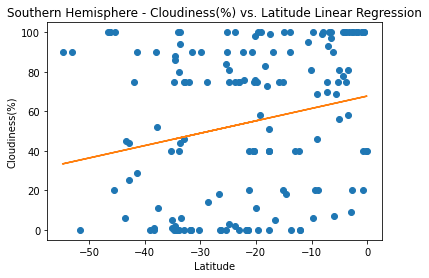

In [41]:
#southern Hemisphere - Cloudiness vs Latitude Linear Regression
#1. create northern hemi DF
#southern Hemisphere (less than 0 degrees latitude)
#2. obtain slops and b (y-intercept)
#3. add linear regression line to scatterplot

#Southern Hemi DF
south_hemi_df = city_df[city_df['Lat']<0]
south_hemi_df

#plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#x and y values
x = np.array(south_hemi_df['Lat'])
y = np.array(south_hemi_df['Cloudiness'])


#north_hemi_plot = plt.scatter(north_hemi_df['Lat'],north_hemi_df['Max Temp'])
plt.plot(x, y, "o")

#obtain m and b(intercept)
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatter plot
plt.plot(x, m*x+b)

#Print r square value
print(f"R squared: {rvalue**2}")

print(line_eq)

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Observation: The correlation between wind speed and latitude in the northern hemisphere is significant. 

R squared: 0.010529031852896688
y = 0.04x + 7.36


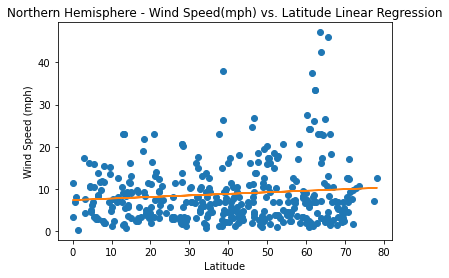

In [42]:
#linear regress

#northern Hemisphere - Wind Speed (%)  vs Latitude Linear Regression
#1. create northern hemi DF
#Northern Hemisphere (greater than or equal to 0 degrees latitude)
#2. obtain slops and b (y-intercept)
#3. add linear regression line to scatterplot

#x and y values
x = np.array(north_hemi_df['Lat'])
y = np.array(north_hemi_df['Wind Speed'])

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression")

#north_hemi_plot = plt.scatter(north_hemi_df['Lat'],north_hemi_df['Max Temp'])
plt.plot(x, y, "o")

#obtain m and b(intercept)
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatter plot
plt.plot(x, m*x+b)

#Print r square value
print(f"R squared: {rvalue**2}")

print(line_eq)

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Observation: The correlation between wind speed and latitude in the Southern hemisphere is not significant

R squared: 0.010529031852896688
y = 0.04x + 7.36


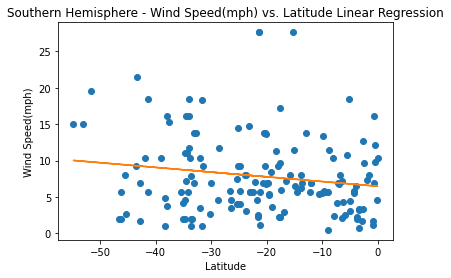

In [43]:
#southern Hemisphere - Wind Speed vs Latitude Linear Regression
#1. create southern hemi DF
#southern Hemisphere (less than 0 degrees latitude)
#2. obtain slops and b (y-intercept)
#3. add linear regression line to scatterplot

#Southern Hemi DF
south_hemi_df = city_df[city_df['Lat']<0]
south_hemi_df

#plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Southern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression")

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#x and y values
x = np.array(south_hemi_df['Lat'])
y = np.array(south_hemi_df['Wind Speed'])


plt.plot(x, y, "o")

#obtain m and b(intercept)
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatter plot
plt.plot(x, m*x+b)

#Print r square value
print(f"R squared: {rvalue**2}")

print(line_eq)

plt.show()